# Chaînes de Markov et Canaux Ioniques

In [1]:
# Commençons par importer les outils dont nous aurons besoin. 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

## Une histoire de canal

Soit un transporteur transmembranaire que l'on trouve dans deux conformations: ouvert ou fermé. On sait que la protéine change de conformation de manière aléatoire selon un certain taux que l'on peut mesurer. 

![svg image](data:image/svg+xml,%3Csvg%0A%20%20%20xmlns%3Adc%3D%22http%3A//purl.org/dc/elements/1.1/%22%0A%20%20%20xmlns%3Acc%3D%22http%3A//creativecommons.org/ns%23%22%0A%20%20%20xmlns%3Ardf%3D%22http%3A//www.w3.org/1999/02/22-rdf-syntax-ns%23%22%0A%20%20%20xmlns%3Asvg%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3Asodipodi%3D%22http%3A//sodipodi.sourceforge.net/DTD/sodipodi-0.dtd%22%0A%20%20%20xmlns%3Ainkscape%3D%22http%3A//www.inkscape.org/namespaces/inkscape%22%0A%20%20%20width%3D%22254.84149mm%22%0A%20%20%20height%3D%2268.327393mm%22%0A%20%20%20viewBox%3D%220%200%20254.84149%2068.327393%22%0A%20%20%20version%3D%221.1%22%0A%20%20%20id%3D%22svg8%22%0A%20%20%20inkscape%3Aversion%3D%220.92.1%20r15371%22%0A%20%20%20sodipodi%3Adocname%3D%22transport_simple.svg%22%3E%0A%20%20%3Cdefs%0A%20%20%20%20%20id%3D%22defs2%22%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4618%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.625%3Bstroke-linejoin%3Around%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%208.7185878%2C4.0337352%20-2.2072895%2C0.01601326%208.7185884%2C-4.0017078%20c%20-1.7454984%2C2.3720609%20-1.7354408%2C5.6174519%20-6e-7%2C8.035443%20z%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%281.1%2C0%2C0%2C1.1%2C1.1%2C0%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow2Lstart-0%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4618-6%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.625%3Bstroke-linejoin%3Around%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%208.7185878%2C4.0337352%20-2.2072895%2C0.01601326%208.7185884%2C-4.0017078%20c%20-1.7454984%2C2.3720609%20-1.7354408%2C5.6174519%20-6e-7%2C8.035443%20z%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%281.1%2C0%2C0%2C1.1%2C1.1%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%3C/defs%3E%0A%20%20%3Csodipodi%3Anamedview%0A%20%20%20%20%20id%3D%22base%22%0A%20%20%20%20%20pagecolor%3D%22%23ffffff%22%0A%20%20%20%20%20bordercolor%3D%22%23666666%22%0A%20%20%20%20%20borderopacity%3D%221.0%22%0A%20%20%20%20%20inkscape%3Apageopacity%3D%220.0%22%0A%20%20%20%20%20inkscape%3Apageshadow%3D%222%22%0A%20%20%20%20%20inkscape%3Azoom%3D%220.98994949%22%0A%20%20%20%20%20inkscape%3Acx%3D%22607.81734%22%0A%20%20%20%20%20inkscape%3Acy%3D%22-82.847296%22%0A%20%20%20%20%20inkscape%3Adocument-units%3D%22mm%22%0A%20%20%20%20%20inkscape%3Acurrent-layer%3D%22layer1%22%0A%20%20%20%20%20showgrid%3D%22false%22%0A%20%20%20%20%20fit-margin-top%3D%220%22%0A%20%20%20%20%20fit-margin-left%3D%220%22%0A%20%20%20%20%20fit-margin-right%3D%220%22%0A%20%20%20%20%20fit-margin-bottom%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-width%3D%221920%22%0A%20%20%20%20%20inkscape%3Awindow-height%3D%221183%22%0A%20%20%20%20%20inkscape%3Awindow-x%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-y%3D%2217%22%0A%20%20%20%20%20inkscape%3Awindow-maximized%3D%221%22%20/%3E%0A%20%20%3Cmetadata%0A%20%20%20%20%20id%3D%22metadata5%22%3E%0A%20%20%20%20%3Crdf%3ARDF%3E%0A%20%20%20%20%20%20%3Ccc%3AWork%0A%20%20%20%20%20%20%20%20%20rdf%3Aabout%3D%22%22%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Aformat%3Eimage/svg%2Bxml%3C/dc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atype%0A%20%20%20%20%20%20%20%20%20%20%20rdf%3Aresource%3D%22http%3A//purl.org/dc/dcmitype/StillImage%22%20/%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atitle%3E%3C/dc%3Atitle%3E%0A%20%20%20%20%20%20%3C/cc%3AWork%3E%0A%20%20%20%20%3C/rdf%3ARDF%3E%0A%20%20%3C/metadata%3E%0A%20%20%3Cg%0A%20%20%20%20%20inkscape%3Alabel%3D%22Layer%201%22%0A%20%20%20%20%20inkscape%3Agroupmode%3D%22layer%22%0A%20%20%20%20%20id%3D%22layer1%22%0A%20%20%20%20%20transform%3D%22translate%281.3363476%2C-28.637586%29%22%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5558%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C-0.393212%29%22%3E%0A%20%20%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20%20%20y%3D%2248.706608%22%0A%20%20%20%20%20%20%20%20%20x%3D%22-1.3363476%22%0A%20%20%20%20%20%20%20%20%20height%3D%2215.768902%22%0A%20%20%20%20%20%20%20%20%20width%3D%22104.50238%22%0A%20%20%20%20%20%20%20%20%20id%3D%22rect4504%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%23ffd42a%3Bfill-opacity%3A0.25177307%3Bstroke%3Anone%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0.265%2C%200.265%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4522%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20-1.3363476%2C48.706608%20H%20103.16603%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4524%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20103.16603%2C64.47551%20H%20-1.3363476%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5576%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C1.2772213%29%22%3E%0A%20%20%20%20%20%20%3Cellipse%0A%20%20%20%20%20%20%20%20%20ry%3D%2225.256971%22%0A%20%20%20%20%20%20%20%20%20rx%3D%229.7553377%22%0A%20%20%20%20%20%20%20%20%20cy%3D%2254.720173%22%0A%20%20%20%20%20%20%20%20%20cx%3D%2238.085907%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cellipse%0A%20%20%20%20%20%20%20%20%20ry%3D%2225.256971%22%0A%20%20%20%20%20%20%20%20%20rx%3D%229.7553377%22%0A%20%20%20%20%20%20%20%20%20cy%3D%2255.121078%22%0A%20%20%20%20%20%20%20%20%20cx%3D%2262.808338%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-5%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2232.339611%22%0A%20%20%20%20%20%20%20y%3D%2296.815117%22%0A%20%20%20%20%20%20%20id%3D%22text4528%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4526%22%0A%20%20%20%20%20%20%20%20%20x%3D%2232.339611%22%0A%20%20%20%20%20%20%20%20%20y%3D%2296.815117%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%3EOuvert%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5553%22%3E%0A%20%20%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20%20%20y%3D%2248.3134%22%0A%20%20%20%20%20%20%20%20%20x%3D%22149.00276%22%0A%20%20%20%20%20%20%20%20%20height%3D%2215.768902%22%0A%20%20%20%20%20%20%20%20%20width%3D%22104.50238%22%0A%20%20%20%20%20%20%20%20%20id%3D%22rect4504-3%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%23ffd42a%3Bfill-opacity%3A0.25177307%3Bstroke%3Anone%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0.265%2C%200.265%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4522-6%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20149.00277%2C48.313392%20H%20253.50515%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4524-1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20253.50515%2C64.082302%20H%20149.00277%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%22182.67873%22%0A%20%20%20%20%20%20%20y%3D%2297.12001%22%0A%20%20%20%20%20%20%20id%3D%22text4528-3%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4526-2%22%0A%20%20%20%20%20%20%20%20%20x%3D%22182.67873%22%0A%20%20%20%20%20%20%20%20%20y%3D%2297.12001%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%3EFerm%C3%A9%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5572%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C1.870888%29%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-0%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20188.42485%2C29.070086%20a%209.7553377%2C25.256971%200%200%200%20-9.75496%2C25.256854%209.7553377%2C25.256971%200%200%200%209.75496%2C25.256855%209.7553377%2C25.256971%200%200%200%207.06831%2C-7.892539%204.4099469%2C3.3408688%200%200%200%200.0145%2C5.16e-4%204.4099469%2C3.3408688%200%200%200%204.41007%2C-3.340881%204.4099469%2C3.3408688%200%200%200%20-2.71353%2C-3.083017%209.7553377%2C25.256971%200%200%200%200.97617%2C-10.940934%209.7553377%2C25.256971%200%200%200%20-9.75548%2C-25.256854%20z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-0-1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20211.85858%2C29.070122%20a%209.7553378%2C25.256971%200%200%201%209.75496%2C25.25686%209.7553378%2C25.256971%200%200%201%20-9.75496%2C25.25685%209.7553378%2C25.256971%200%200%201%20-7.0683%2C-7.89254%204.4099469%2C3.3408689%200%200%201%20-0.0145%2C5.3e-4%204.4099469%2C3.3408689%200%200%201%20-4.41007%2C-3.34088%204.4099469%2C3.3408689%200%200%201%202.71353%2C-3.08302%209.7553378%2C25.256971%200%200%201%20-0.97617%2C-10.94093%209.7553378%2C25.256971%200%200%201%209.75548%2C-25.25686%20z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5568%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C-0.384405%29%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4598%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20109.58051%2C51.112034%20h%2034.2105%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23Arrow2Lstart%29%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4598-1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20144.02423%2C62.05247%20h%20-34.2105%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23Arrow2Lstart-0%29%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%3C/g%3E%0A%3C/svg%3E)

On souhaite modéliser ce système pour répondre à un certain nombre de questions:
- Quel est le comportement d'un tel transporteur sur le temps long ?
- Quel est le comportement d'une population de transporteurs ? 

En utilisant les outils du cours, quelle approche utiliseriez vous pour modéliser ce système?

*Exercice: Écrivez un tel modèle*

# Modélisation

Nous alons utiliser une **Chaîne de Markov**

- Avec comme **espace d'état** (de cardinal fini) l'ensemble `{Fermé, Ouvert}` ou $\{0,1\}$. 
- Avec comme **condition initiale** $X_0$, qui peut être une variable aléatoire (Sa loi est appelée **mesure initiale** de la chaîne) ou une valeur déterministe (par exemple `Ouvert`, ce qui revient à avoir comme mesure initiale $P(X_0=1)=1$).
- Avec les **probabilités de transitions**: $a_{ij} = \mathbb P (X_{n+1} = j \mid X_n=i)$

Que l'on note la **matrice de transition** suivante: 
$$
A = 
 \begin{pmatrix}
  1-p & p \\
  q & 1-q \\
 \end{pmatrix}
$$



![svg image](data:image/svg+xml,%3Csvg%0A%20%20%20xmlns%3Adc%3D%22http%3A//purl.org/dc/elements/1.1/%22%0A%20%20%20xmlns%3Acc%3D%22http%3A//creativecommons.org/ns%23%22%0A%20%20%20xmlns%3Ardf%3D%22http%3A//www.w3.org/1999/02/22-rdf-syntax-ns%23%22%0A%20%20%20xmlns%3Asvg%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3Asodipodi%3D%22http%3A//sodipodi.sourceforge.net/DTD/sodipodi-0.dtd%22%0A%20%20%20xmlns%3Ainkscape%3D%22http%3A//www.inkscape.org/namespaces/inkscape%22%0A%20%20%20width%3D%2242.558151mm%22%0A%20%20%20height%3D%2217.437698mm%22%0A%20%20%20viewBox%3D%220%200%2042.55815%2017.437698%22%0A%20%20%20version%3D%221.1%22%0A%20%20%20id%3D%22svg5603%22%0A%20%20%20inkscape%3Aversion%3D%220.92.1%20r15371%22%0A%20%20%20sodipodi%3Adocname%3D%22cdm_simple.svg%22%3E%0A%20%20%3Cdefs%0A%20%20%20%20%20id%3D%22defs5597%22%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow1Send%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow1Send%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4615%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C0%205%2C-5%20-12.5%2C0%205%2C5%20Z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%28-0.2%2C0%2C0%2C-0.2%2C-1.2%2C0%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow1Lend%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow1Lend%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4603%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C0%205%2C-5%20-12.5%2C0%205%2C5%20Z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%28-0.8%2C0%2C0%2C-0.8%2C-10%2C0%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow1Lend%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow1Lend-8%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4603-2%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C0%205%2C-5%20-12.5%2C0%205%2C5%20Z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%28-0.8%2C0%2C0%2C-0.8%2C-10%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow1Send%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow1Send-9%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4615-6%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C0%205%2C-5%20-12.5%2C0%205%2C5%20Z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%28-0.2%2C0%2C0%2C-0.2%2C-1.2%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow1Send%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow1Send-9-2%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4615-6-7%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C0%205%2C-5%20-12.5%2C0%205%2C5%20Z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%28-0.2%2C0%2C0%2C-0.2%2C-1.2%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow1Send%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow1Send-9-2-1%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4615-6-7-3%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%200%2C0%205%2C-5%20-12.5%2C0%205%2C5%20Z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1.00000003pt%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%28-0.2%2C0%2C0%2C-0.2%2C-1.2%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%3C/defs%3E%0A%20%20%3Csodipodi%3Anamedview%0A%20%20%20%20%20id%3D%22base%22%0A%20%20%20%20%20pagecolor%3D%22%23ffffff%22%0A%20%20%20%20%20bordercolor%3D%22%23666666%22%0A%20%20%20%20%20borderopacity%3D%221.0%22%0A%20%20%20%20%20inkscape%3Apageopacity%3D%220.0%22%0A%20%20%20%20%20inkscape%3Apageshadow%3D%222%22%0A%20%20%20%20%20inkscape%3Azoom%3D%221.979899%22%0A%20%20%20%20%20inkscape%3Acx%3D%22257.98513%22%0A%20%20%20%20%20inkscape%3Acy%3D%22-79.320967%22%0A%20%20%20%20%20inkscape%3Adocument-units%3D%22mm%22%0A%20%20%20%20%20inkscape%3Acurrent-layer%3D%22layer1%22%0A%20%20%20%20%20showgrid%3D%22false%22%0A%20%20%20%20%20showguides%3D%22false%22%0A%20%20%20%20%20fit-margin-top%3D%220%22%0A%20%20%20%20%20fit-margin-left%3D%220%22%0A%20%20%20%20%20fit-margin-right%3D%220%22%0A%20%20%20%20%20fit-margin-bottom%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-width%3D%221920%22%0A%20%20%20%20%20inkscape%3Awindow-height%3D%221183%22%0A%20%20%20%20%20inkscape%3Awindow-x%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-y%3D%2217%22%0A%20%20%20%20%20inkscape%3Awindow-maximized%3D%221%22%20/%3E%0A%20%20%3Cmetadata%0A%20%20%20%20%20id%3D%22metadata5600%22%3E%0A%20%20%20%20%3Crdf%3ARDF%3E%0A%20%20%20%20%20%20%3Ccc%3AWork%0A%20%20%20%20%20%20%20%20%20rdf%3Aabout%3D%22%22%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Aformat%3Eimage/svg%2Bxml%3C/dc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atype%0A%20%20%20%20%20%20%20%20%20%20%20rdf%3Aresource%3D%22http%3A//purl.org/dc/dcmitype/StillImage%22%20/%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atitle%3E%3C/dc%3Atitle%3E%0A%20%20%20%20%20%20%3C/cc%3AWork%3E%0A%20%20%20%20%3C/rdf%3ARDF%3E%0A%20%20%3C/metadata%3E%0A%20%20%3Cg%0A%20%20%20%20%20inkscape%3Alabel%3D%22Layer%201%22%0A%20%20%20%20%20inkscape%3Agroupmode%3D%22layer%22%0A%20%20%20%20%20id%3D%22layer1%22%0A%20%20%20%20%20transform%3D%22translate%2820.042336%2C7.366437%29%22%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g6195%22%0A%20%20%20%20%20%20%20transform%3D%22matrix%280.35965934%2C0%2C0%2C0.35965934%2C-12.833923%2C-4.7170295%29%22%3E%0A%20%20%20%20%20%20%3Ccircle%0A%20%20%20%20%20%20%20%20%20r%3D%2210.583333%22%0A%20%20%20%20%20%20%20%20%20cy%3D%2216.730654%22%0A%20%20%20%20%20%20%20%20%20cx%3D%2216.404314%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path6148%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3Anone%3Bfill-opacity%3A1%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20%20%20id%3D%22text6152%22%0A%20%20%20%20%20%20%20%20%20y%3D%2220.583132%22%0A%20%20%20%20%20%20%20%20%20x%3D%2213.040178%22%0A%20%20%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%0A%20%20%20%20%20%20%20%20%20%20%20y%3D%2220.583132%22%0A%20%20%20%20%20%20%20%20%20%20%20x%3D%2213.040178%22%0A%20%20%20%20%20%20%20%20%20%20%20id%3D%22tspan6150%22%0A%20%20%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%3E0%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g6190%22%0A%20%20%20%20%20%20%20transform%3D%22matrix%280.35965934%2C0%2C0%2C0.35965934%2C-8.8236144%2C-4.8529722%29%22%3E%0A%20%20%20%20%20%20%3Ccircle%0A%20%20%20%20%20%20%20%20%20r%3D%2210.583333%22%0A%20%20%20%20%20%20%20%20%20cy%3D%2216.730654%22%0A%20%20%20%20%20%20%20%20%20cx%3D%2250.234287%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path6148-4%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3Anone%3Bfill-opacity%3A1%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20%20%20id%3D%22text6152-0%22%0A%20%20%20%20%20%20%20%20%20y%3D%2220.588299%22%0A%20%20%20%20%20%20%20%20%20x%3D%2246.774551%22%0A%20%20%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%0A%20%20%20%20%20%20%20%20%20%20%20y%3D%2220.588299%22%0A%20%20%20%20%20%20%20%20%20%20%20x%3D%2246.774551%22%0A%20%20%20%20%20%20%20%20%20%20%20id%3D%22tspan6150-6%22%0A%20%20%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%3E1%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.38303721%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-end%3Aurl%28%23Arrow1Send%29%22%0A%20%20%20%20%20%20%20d%3D%22m%20-4.4734491%2C-1.9623175%20c%203.118801%2C-2.7052835%207.2694683%2C-2.6714419%2010.2636708%2C0.1359428%22%0A%20%20%20%20%20%20%20id%3D%22path6185%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.38303721%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-end%3Aurl%28%23Arrow1Send-9%29%22%0A%20%20%20%20%20%20%20d%3D%22M%206.826552%2C4.5198078%20C%203.707751%2C7.2250916%20-0.44291669%2C7.1912498%20-3.4371195%2C4.3838652%22%0A%20%20%20%20%20%20%20id%3D%22path6185-0%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.38303721%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-end%3Aurl%28%23Arrow1Send-9-2%29%22%0A%20%20%20%20%20%20%20d%3D%22m%2013.555715%2C1.4732796%20c%203.604762%2C0.8232332%203.113377%2C-4.2868953%20-0.03399%2C-2.5149392%22%0A%20%20%20%20%20%20%20id%3D%22path6185-0-6%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.38303721%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-end%3Aurl%28%23Arrow1Send-9-2-1%29%22%0A%20%20%20%20%20%20%20d%3D%22m%20-11.147949%2C1.4732796%20c%20-3.604762%2C0.8232332%20-3.113377%2C-4.2868955%200.03399%2C-2.5149392%22%0A%20%20%20%20%20%20%20id%3D%22path6185-0-6-2%22%0A%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cc%22%20/%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-size%3A3.80639458px%3Bline-height%3A8.37406826px%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23666666%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.09515986px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%22-0.19125485%22%0A%20%20%20%20%20%20%20y%3D%229.2869368%22%0A%20%20%20%20%20%20%20id%3D%22text10977%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan10975%22%0A%20%20%20%20%20%20%20%20%20x%3D%22-0.19125485%22%0A%20%20%20%20%20%20%20%20%20y%3D%229.2869368%22%0A%20%20%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bfill%3A%23666666%3Bstroke-width%3A0.09515986px%22%3Eq%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-size%3A3.80639458px%3Bline-height%3A8.37406826px%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23666666%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.09515986px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%220.061246462%22%0A%20%20%20%20%20%20%20y%3D%22-5.234633%22%0A%20%20%20%20%20%20%20id%3D%22text10977-2%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan10975-8%22%0A%20%20%20%20%20%20%20%20%20x%3D%220.061246462%22%0A%20%20%20%20%20%20%20%20%20y%3D%22-5.234633%22%0A%20%20%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bfill%3A%23666666%3Bstroke-width%3A0.09515986px%22%3Ep%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-size%3A3.80639458px%3Bline-height%3A8.37406826px%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23666666%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.09515986px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%22-20.228195%22%0A%20%20%20%20%20%20%20y%3D%221.4082375%22%0A%20%20%20%20%20%20%20id%3D%22text10977-2-4%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan10975-8-2%22%0A%20%20%20%20%20%20%20%20%20x%3D%22-20.228195%22%0A%20%20%20%20%20%20%20%20%20y%3D%221.4082375%22%0A%20%20%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bfill%3A%23666666%3Bstroke-width%3A0.09515986px%22%3E1-p%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-size%3A3.80639458px%3Bline-height%3A8.37406826px%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23666666%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.09515986px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2216.443798%22%0A%20%20%20%20%20%20%20y%3D%221.4082375%22%0A%20%20%20%20%20%20%20id%3D%22text10977-2-4-3%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan10975-8-2-3%22%0A%20%20%20%20%20%20%20%20%20x%3D%2216.443798%22%0A%20%20%20%20%20%20%20%20%20y%3D%221.4082375%22%0A%20%20%20%20%20%20%20%20%20style%3D%22font-style%3Aitalic%3Bfont-variant%3Anormal%3Bfont-weight%3Anormal%3Bfont-stretch%3Anormal%3Bfont-family%3ASans%3B-inkscape-font-specification%3A%27Sans%20Italic%27%3Bfill%3A%23666666%3Bstroke-width%3A0.09515986px%22%3E1-q%3C/tspan%3E%3C/text%3E%0A%20%20%3C/g%3E%0A%3C/svg%3E)


Si $p \notin \{0,1\} $ and $q \notin \{0,1\}$,
Cette chaîne de markov est **irréductible** car elle comporte une seule **classe d'état qui communiquent**. Cette classe est **récurrente**. Comme la chaîne a un espace d'état fini, cette récurrence est nécessairement **positive**.

Quelles sont les propriétés d'une matrice de transition ? 

*Exercice: Écrivez une fonction en python qui prend une matrice comme paramètre et lève une erreur si ce n'est pas une matrice stochastique*.


In [2]:
P = np.array([[0.9,.1],
              [0.4,0.6]])
P2 = np.array([[0.8,.1,.1],
              [0.4,0.3,0.3],
              [0.2,0.6,0.2]])
P3 = np.array([[0,1],
               [1,0]])

mu = np.array([.3,.7])
mu3 = np.array([.1,.9])
mu2 = np.array([.3,.7,0])

In [3]:
# Écrire une fonction assert_transition_matrix(P) 
# qui lève une exception si la matrice P 
# N'est pas une matrice stochastique. 
# Utilisez: assert, np.testing.assert_allclose

In [4]:
def assert_transition_matrix(P):
    """Raise an Assertion error if the matrix is not stochastic"""
    assert P.ndim == 2, 'Not a 2D matrix'
    assert P.shape[0] == P.shape[1], 'Matrix is not square'
    np.testing.assert_allclose(np.sum(P,1), [1]*P.shape[0], err_msg='Lines do not sum at 1.')

P = np.array([[0.9,.1],[.2,.8]])
assert_transition_matrix(P)

# Essayez: 
#P = np.array([[0.8,.1],[.2,.8]])
#assert_transition_matrix(P)

#### Remarque: Comparaison de nombre à virgule flotante

Vous observez que l'on ne teste (jamais) la somme de nombres à virgule flotante avec une égalité stricte. En effet, la représentation des nombres à virgule flottante pose de nombreux problèmes. 

Essayez:

```python
assert 0.1 + 0.2 == 0.3 
```

Vous devriez avoir une erreur. En effet s'il est impossible de représenter $\frac{1}{3}$ dans l'écriture décimale sans utiliser une infinité de nombres après la virgule ($0.33333...$), c'est aussi le cas de $0.1$ en écriture binaire ($0.0001100110011...$)

| Nombre | Base 10 | Base 2 | 
|-------------------------------|
| 1      | 1 | 1|
| 2 | 2 | 10 |
| 3 | 3 | 11 |
| $\frac{1}{2}$| 0.5 | 0.1 |
| $\frac{1}{10}$   | 0.1     | $0.0\overline{0011}$ |
| $\frac{1}{5}$   | 0.2     | $0.\overline{0011}$ |
| $\frac{1}{3}$| $0.\overline{3}$| $0.\overline{01}$ |

*Il y a 10 types de personnes dans le monde: ceux qui comprennent le binaire, ceux qui ne le comprennent pas et ceux qui pensaient que cette blague était en ternaire.* 

En général on teste l'égalité des nombre à virgule flotante à une certaine précision près. Par exemple on testera:

```python
assert abs(((0.1 + 0.2)-0.3)/0.3) < 1e-6
```

La fonction [`numpy.testing.assert_allclose`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.testing.assert_allclose.html#numpy.testing.assert_allclose) permet de faire de telles comparaisons élément par élément sur un array. 

Une seconde solution est d'utiliser une bibliothèque de calcul avec des nombre décimaux à précision arbitraire:

```python
from decimal import Decimal
assert Decimal('0.2')+Decimal('0.1') == Decimal('0.3')
```

Mais ces bibliothèques sont beaucoup plus lentes que les calculs natifs que fait le processeur en virgule flotante. Pour la majeure partie des applications en biologie, cela n'est pas nécessaire.  

References : 
- [Floating point guide](http://floating-point-gui.de/)
- Goldberg, David (March 1991). ["What Every Computer Scientist Should Know About Floating-Point Arithmetic"](http://perso.ens-lyon.fr/jean-michel.muller/goldberg.pdf) ACM Computing Surveys. 23 (1): 5–48. doi:10.1145/103162.103163

# Simulation 

Comment simuler la **trajectoire** d'un tel objet ? 

La trajectoire est la donnée $(X_n)_{n = 0,1,2...}$, c'est à dire une suite à valeur dans l'espace d'état et indexée sur les nombre entiers.

## Réaliser des tirages de nombres aléatoires à l'aide d'un ordinateur. 

En fait, il est impossible de réaliser des tirages de nombre aléatoire avec la majorité des ordinateurs sur lequels vous serez amené à travailler. Il faudrait un [matériel particulier](https://fr.wikipedia.org/wiki/G%C3%A9n%C3%A9rateur_de_nombres_al%C3%A9atoires_mat%C3%A9riel). À la place on utilise des suites de nombres pseudo aléatoires.

À la place les ordinateurs utilisent un algorithme qui génère une suite de nombres, qui a [l'air aléatoire](https://fr.wikipedia.org/wiki/G%C3%A9n%C3%A9rateur_de_nombres_al%C3%A9atoires). Par exemple un [générateur congruentiel linéaire](https://fr.wikipedia.org/wiki/G%C3%A9n%C3%A9rateur_congruentiel_lin%C3%A9aire) fonctionne ainsi:

\begin{equation}
X_{n+1} = (a X_n + b) \text{ mod } m
\end{equation}

Cette suite est périodique et si on prend a = 25, c = 16, m = 256, X0 = 50 cette periode est de 5 ! 

> 50, 242, 178, 114, **50**, 242, 178, 114, 50, 242, ...

Il est donc important de bien choisir ces paramètres.

Numpy implémente un générateur de nombre pseudo aléatoire appelé *[Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister)*, qui est très rapide et génère une chaine de nombres en 32bits uniforméments distribués. Chaque appel à la fonction `np.random.random()` va vous donner le prochain élément dans la suite de nombres pseudo aléatoires qu'utilise numpy. La période de cette suite est de $2^{{19937}}-1$. 

Les nombres pseudo aléatoires dépendent de la condition initiale du générateur- que l'on appelle la graine. Vous pouvez fixer la graine de numpy à l'aide de la commande `np.seed`. Essayez donc:

In [5]:
np.random.seed(111)
# Pas d'erreur ! On peut lancer cette cellule autant de fois que l'on veut ! 
assert np.random.random() - 0.6121701756176187 < 1e-10

## Méthode naïve 
$a_{ij} = \mathbb P (X_{n+1} = j \mid X_n=i)$

In [6]:
# Écrire une fonction mc_trajectoire(mu, P, Tmax) qui 
# échantillonne la chaîne de markov (mu, P) où P est une matrice 2x2 du temps 0 au temps Tmax. 
# Utilisez: np.random

In [7]:
def simulation_naive():
    pass

In [8]:
def mc_trajctoire(mu, P, Tmax):
    """Retourne la trajectoire de la chaine mu,P sur 1...Tmax"""
    trajectoire = []
    
    # Condition initiales: 
    x0 = int(np.random.random() < mu[1])
    trajectoires.append(x0)
    
    # Chaque pas de temps
    for t in range(Tmax-1):
        x = trajectoire[-1]
        rd = np.random.random()
        if x == 0: 
            if rd < P[0,1]:
                new_x = 1 
            else:
                new_x = 0 
        else: 
            new_x = int(rd < P[1,1])
        trajectoire.append(new_x)
    
    return trajectoire

Si on prend une chaine légèrement plus compliquée, par exemple en ajoutant un troisième état, il faut changer notre algorithme !

![svg image](data:image/svg+xml,%3Csvg%0A%20%20%20xmlns%3Adc%3D%22http%3A//purl.org/dc/elements/1.1/%22%0A%20%20%20xmlns%3Acc%3D%22http%3A//creativecommons.org/ns%23%22%0A%20%20%20xmlns%3Ardf%3D%22http%3A//www.w3.org/1999/02/22-rdf-syntax-ns%23%22%0A%20%20%20xmlns%3Asvg%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3D%22http%3A//www.w3.org/2000/svg%22%0A%20%20%20xmlns%3Asodipodi%3D%22http%3A//sodipodi.sourceforge.net/DTD/sodipodi-0.dtd%22%0A%20%20%20xmlns%3Ainkscape%3D%22http%3A//www.inkscape.org/namespaces/inkscape%22%0A%20%20%20width%3D%22254.84149mm%22%0A%20%20%20height%3D%22159.90611mm%22%0A%20%20%20viewBox%3D%220%200%20254.84149%20159.90611%22%0A%20%20%20version%3D%221.1%22%0A%20%20%20id%3D%22svg8%22%0A%20%20%20inkscape%3Aversion%3D%220.92.1%20r15371%22%0A%20%20%20sodipodi%3Adocname%3D%22transport_3.svg%22%3E%0A%20%20%3Cdefs%0A%20%20%20%20%20id%3D%22defs2%22%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4618%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.625%3Bstroke-linejoin%3Around%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%208.7185878%2C4.0337352%20-2.2072895%2C0.01601326%208.7185884%2C-4.0017078%20c%20-1.7454984%2C2.3720609%20-1.7354408%2C5.6174519%20-6e-7%2C8.035443%20z%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%281.1%2C0%2C0%2C1.1%2C1.1%2C0%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow2Lstart-0%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4618-6%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.625%3Bstroke-linejoin%3Around%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%208.7185878%2C4.0337352%20-2.2072895%2C0.01601326%208.7185884%2C-4.0017078%20c%20-1.7454984%2C2.3720609%20-1.7354408%2C5.6174519%20-6e-7%2C8.035443%20z%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%281.1%2C0%2C0%2C1.1%2C1.1%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow2Lstart-08%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4618-1%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.625%3Bstroke-linejoin%3Around%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%208.7185878%2C4.0337352%20-2.2072895%2C0.01601326%208.7185884%2C-4.0017078%20c%20-1.7454984%2C2.3720609%20-1.7354408%2C5.6174519%20-6e-7%2C8.035443%20z%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%281.1%2C0%2C0%2C1.1%2C1.1%2C0%29%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%20%20%3Cmarker%0A%20%20%20%20%20%20%20inkscape%3Astockid%3D%22Arrow2Lstart%22%0A%20%20%20%20%20%20%20orient%3D%22auto%22%0A%20%20%20%20%20%20%20refY%3D%220%22%0A%20%20%20%20%20%20%20refX%3D%220%22%0A%20%20%20%20%20%20%20id%3D%22Arrow2Lstart-0-9%22%0A%20%20%20%20%20%20%20style%3D%22overflow%3Avisible%22%0A%20%20%20%20%20%20%20inkscape%3Aisstock%3D%22true%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4618-6-9%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3A%23000000%3Bfill-opacity%3A1%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A0.625%3Bstroke-linejoin%3Around%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%208.7185878%2C4.0337352%20-2.2072895%2C0.01601326%208.7185884%2C-4.0017078%20c%20-1.7454984%2C2.3720609%20-1.7354408%2C5.6174519%20-6e-7%2C8.035443%20z%22%0A%20%20%20%20%20%20%20%20%20transform%3D%22matrix%281.1%2C0%2C0%2C1.1%2C1.1%2C0%29%22%20/%3E%0A%20%20%20%20%3C/marker%3E%0A%20%20%3C/defs%3E%0A%20%20%3Csodipodi%3Anamedview%0A%20%20%20%20%20id%3D%22base%22%0A%20%20%20%20%20pagecolor%3D%22%23ffffff%22%0A%20%20%20%20%20bordercolor%3D%22%23666666%22%0A%20%20%20%20%20borderopacity%3D%221.0%22%0A%20%20%20%20%20inkscape%3Apageopacity%3D%220.0%22%0A%20%20%20%20%20inkscape%3Apageshadow%3D%222%22%0A%20%20%20%20%20inkscape%3Azoom%3D%220.7%22%0A%20%20%20%20%20inkscape%3Acx%3D%22371.16283%22%0A%20%20%20%20%20inkscape%3Acy%3D%22565.3398%22%0A%20%20%20%20%20inkscape%3Adocument-units%3D%22mm%22%0A%20%20%20%20%20inkscape%3Acurrent-layer%3D%22layer1%22%0A%20%20%20%20%20showgrid%3D%22false%22%0A%20%20%20%20%20fit-margin-top%3D%220%22%0A%20%20%20%20%20fit-margin-left%3D%220%22%0A%20%20%20%20%20fit-margin-right%3D%220%22%0A%20%20%20%20%20fit-margin-bottom%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-width%3D%221920%22%0A%20%20%20%20%20inkscape%3Awindow-height%3D%221183%22%0A%20%20%20%20%20inkscape%3Awindow-x%3D%220%22%0A%20%20%20%20%20inkscape%3Awindow-y%3D%2217%22%0A%20%20%20%20%20inkscape%3Awindow-maximized%3D%221%22%20/%3E%0A%20%20%3Cmetadata%0A%20%20%20%20%20id%3D%22metadata5%22%3E%0A%20%20%20%20%3Crdf%3ARDF%3E%0A%20%20%20%20%20%20%3Ccc%3AWork%0A%20%20%20%20%20%20%20%20%20rdf%3Aabout%3D%22%22%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Aformat%3Eimage/svg%2Bxml%3C/dc%3Aformat%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atype%0A%20%20%20%20%20%20%20%20%20%20%20rdf%3Aresource%3D%22http%3A//purl.org/dc/dcmitype/StillImage%22%20/%3E%0A%20%20%20%20%20%20%20%20%3Cdc%3Atitle%3E%3C/dc%3Atitle%3E%0A%20%20%20%20%20%20%3C/cc%3AWork%3E%0A%20%20%20%20%3C/rdf%3ARDF%3E%0A%20%20%3C/metadata%3E%0A%20%20%3Cg%0A%20%20%20%20%20inkscape%3Alabel%3D%22Layer%201%22%0A%20%20%20%20%20inkscape%3Agroupmode%3D%22layer%22%0A%20%20%20%20%20id%3D%22layer1%22%0A%20%20%20%20%20transform%3D%22translate%281.3363476%2C-30.307923%29%22%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5558%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C-0.393212%29%22%3E%0A%20%20%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20%20%20y%3D%2248.706608%22%0A%20%20%20%20%20%20%20%20%20x%3D%22-1.3363476%22%0A%20%20%20%20%20%20%20%20%20height%3D%2215.768902%22%0A%20%20%20%20%20%20%20%20%20width%3D%22104.50238%22%0A%20%20%20%20%20%20%20%20%20id%3D%22rect4504%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%23ffd42a%3Bfill-opacity%3A0.25177307%3Bstroke%3Anone%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0.265%2C%200.265%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4522%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20-1.3363476%2C48.706608%20H%20103.16603%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4524%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20103.16603%2C64.47551%20H%20-1.3363476%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5576%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C1.2772213%29%22%3E%0A%20%20%20%20%20%20%3Cellipse%0A%20%20%20%20%20%20%20%20%20ry%3D%2225.256971%22%0A%20%20%20%20%20%20%20%20%20rx%3D%229.7553377%22%0A%20%20%20%20%20%20%20%20%20cy%3D%2254.720173%22%0A%20%20%20%20%20%20%20%20%20cx%3D%2238.085907%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cellipse%0A%20%20%20%20%20%20%20%20%20ry%3D%2225.256971%22%0A%20%20%20%20%20%20%20%20%20rx%3D%229.7553377%22%0A%20%20%20%20%20%20%20%20%20cy%3D%2255.121078%22%0A%20%20%20%20%20%20%20%20%20cx%3D%2262.808338%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-5%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%2232.339611%22%0A%20%20%20%20%20%20%20y%3D%2296.815117%22%0A%20%20%20%20%20%20%20id%3D%22text4528%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4526%22%0A%20%20%20%20%20%20%20%20%20x%3D%2232.339611%22%0A%20%20%20%20%20%20%20%20%20y%3D%2296.815117%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%3EOuvert%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5553%22%3E%0A%20%20%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20%20%20y%3D%2248.3134%22%0A%20%20%20%20%20%20%20%20%20x%3D%22149.00276%22%0A%20%20%20%20%20%20%20%20%20height%3D%2215.768902%22%0A%20%20%20%20%20%20%20%20%20width%3D%22104.50238%22%0A%20%20%20%20%20%20%20%20%20id%3D%22rect4504-3%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%23ffd42a%3Bfill-opacity%3A0.25177307%3Bstroke%3Anone%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0.265%2C%200.265%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4522-6%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20149.00277%2C48.313392%20H%20253.50515%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4524-1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20253.50515%2C64.082302%20H%20149.00277%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%22182.67873%22%0A%20%20%20%20%20%20%20y%3D%2297.12001%22%0A%20%20%20%20%20%20%20id%3D%22text4528-3%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4526-2%22%0A%20%20%20%20%20%20%20%20%20x%3D%22182.67873%22%0A%20%20%20%20%20%20%20%20%20y%3D%2297.12001%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%3EFerm%C3%A9%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5572%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C1.870888%29%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-0%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20188.42485%2C29.070086%20a%209.7553377%2C25.256971%200%200%200%20-9.75496%2C25.256854%209.7553377%2C25.256971%200%200%200%209.75496%2C25.256855%209.7553377%2C25.256971%200%200%200%207.06831%2C-7.892539%204.4099469%2C3.3408688%200%200%200%200.0145%2C5.16e-4%204.4099469%2C3.3408688%200%200%200%204.41007%2C-3.340881%204.4099469%2C3.3408688%200%200%200%20-2.71353%2C-3.083017%209.7553377%2C25.256971%200%200%200%200.97617%2C-10.940934%209.7553377%2C25.256971%200%200%200%20-9.75548%2C-25.256854%20z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-0-1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20211.85858%2C29.070122%20a%209.7553378%2C25.256971%200%200%201%209.75496%2C25.25686%209.7553378%2C25.256971%200%200%201%20-9.75496%2C25.25685%209.7553378%2C25.256971%200%200%201%20-7.0683%2C-7.89254%204.4099469%2C3.3408689%200%200%201%20-0.0145%2C5.3e-4%204.4099469%2C3.3408689%200%200%201%20-4.41007%2C-3.34088%204.4099469%2C3.3408689%200%200%201%202.71353%2C-3.08302%209.7553378%2C25.256971%200%200%201%20-0.97617%2C-10.94093%209.7553378%2C25.256971%200%200%201%209.75548%2C-25.25686%20z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5568%22%0A%20%20%20%20%20%20%20transform%3D%22translate%280%2C-0.384405%29%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4598%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20109.58051%2C51.112034%20h%2034.2105%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23Arrow2Lstart%29%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4598-1%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20144.02423%2C62.05247%20h%20-34.2105%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23Arrow2Lstart-0%29%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20transform%3D%22translate%28-69.222809%2C95.884142%29%22%0A%20%20%20%20%20%20%20id%3D%22g5553-4%22%3E%0A%20%20%20%20%20%20%3Crect%0A%20%20%20%20%20%20%20%20%20y%3D%2248.3134%22%0A%20%20%20%20%20%20%20%20%20x%3D%22149.00276%22%0A%20%20%20%20%20%20%20%20%20height%3D%2215.768902%22%0A%20%20%20%20%20%20%20%20%20width%3D%22104.50238%22%0A%20%20%20%20%20%20%20%20%20id%3D%22rect4504-3-9%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%23ffd42a%3Bfill-opacity%3A0.25177307%3Bstroke%3Anone%3Bstroke-width%3A0.26499999%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3A0.265%2C%200.265%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4522-6-9%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20149.00277%2C48.313392%20H%20253.50515%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4524-1-4%22%0A%20%20%20%20%20%20%20%20%20d%3D%22M%20253.50515%2C64.082302%20H%20149.00277%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bfill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23ff6600%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Ctext%0A%20%20%20%20%20%20%20xml%3Aspace%3D%22preserve%22%0A%20%20%20%20%20%20%20style%3D%22font-style%3Anormal%3Bfont-weight%3Anormal%3Bfont-size%3A10.58333302px%3Bline-height%3A23.28333282px%3Bfont-family%3ASans%3Bletter-spacing%3A0px%3Bword-spacing%3A0px%3Bfill%3A%23000000%3Bfill-opacity%3A1%3Bstroke%3Anone%3Bstroke-width%3A0.26458332px%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20x%3D%22108.64507%22%0A%20%20%20%20%20%20%20y%3D%22187.94754%22%0A%20%20%20%20%20%20%20id%3D%22text4528-3-5%22%3E%3Ctspan%0A%20%20%20%20%20%20%20%20%20sodipodi%3Arole%3D%22line%22%0A%20%20%20%20%20%20%20%20%20id%3D%22tspan4526-2-9%22%0A%20%20%20%20%20%20%20%20%20x%3D%22108.64507%22%0A%20%20%20%20%20%20%20%20%20y%3D%22187.94754%22%0A%20%20%20%20%20%20%20%20%20style%3D%22stroke-width%3A0.26458332px%22%3EInactiv%C3%A9%3C/tspan%3E%3C/text%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5572-3%22%0A%20%20%20%20%20%20%20transform%3D%22translate%28-69.222809%2C97.755032%29%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-0-5%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20188.67591%2C35.571181%20c%20-11.1517%2C5.4e-4%20-10.006%2C4.807147%20-10.00602%2C18.755759%202e-5%2C13.948613%204.3674%2C25.256315%209.75496%2C25.256855%202.67436%2C-0.0112%205.22966%2C-2.864481%207.06831%2C-7.892539%200.005%2C1.78e-4%200.01%2C3.5e-4%200.0145%2C5.16e-4%202.4356%2C5.2e-5%204.41008%2C-1.495729%204.41007%2C-3.340881%20-4.1e-4%2C-1.348346%20-1.07067%2C-2.564336%20-2.71353%2C-3.083017%200.63837%2C-3.411129%200.972%2C-7.150514%200.97617%2C-10.940934%20-2e-5%2C-13.949138%207.12809%2C-18.755962%20-9.50446%2C-18.755759%20z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22ccccccccc%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20id%3D%22path4485-0-1-7%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20212.04757%2C35.212235%20c%2013.51405%2C-0.09395%209.56595%2C5.166132%209.56597%2C19.114747%20-3e-5%2C13.948611%20-4.3674%2C25.25631%20-9.75496%2C25.25685%20-2.67435%2C-0.01121%20-5.22966%2C-2.864488%20-7.0683%2C-7.89254%20-0.005%2C1.83e-4%20-0.01%2C3.59e-4%20-0.0145%2C5.3e-4%20-2.4356%2C5.2e-5%20-4.41008%2C-1.495728%20-4.41007%2C-3.34088%204.1e-4%2C-1.348347%201.07067%2C-2.564338%202.71353%2C-3.08302%20-0.63837%2C-3.411128%20-0.972%2C-7.150511%20-0.97617%2C-10.94093%20-1.87081%2C-13.904533%20-7.02685%2C-18.843533%209.94447%2C-19.114747%20z%22%0A%20%20%20%20%20%20%20%20%20style%3D%22opacity%3A1%3Bvector-effect%3Anone%3Bfill%3A%232ca02c%3Bfill-opacity%3A1%3Bstroke%3A%23447821%3Bstroke-width%3A0.86500001%3Bstroke-linecap%3Around%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-dashoffset%3A0%3Bstroke-opacity%3A1%22%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20sodipodi%3Anodetypes%3D%22cccccccccc%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%20%20%3Cg%0A%20%20%20%20%20%20%20id%3D%22g5568-7%22%0A%20%20%20%20%20%20%20transform%3D%22rotate%2860%2C53.101983%2C50.854399%29%22%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4598-8%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20167.03688%2C-35.830548%208.85433%2C33.0448053%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23Arrow2Lstart-08%29%22%20/%3E%0A%20%20%20%20%20%20%3Cpath%0A%20%20%20%20%20%20%20%20%20inkscape%3Aconnector-curvature%3D%220%22%0A%20%20%20%20%20%20%20%20%20id%3D%22path4598-1-2%22%0A%20%20%20%20%20%20%20%20%20d%3D%22m%20144.02423%2C62.05247%20h%20-34.2105%22%0A%20%20%20%20%20%20%20%20%20style%3D%22fill%3Anone%3Bfill-rule%3Aevenodd%3Bstroke%3A%23000000%3Bstroke-width%3A1%3Bstroke-linecap%3Abutt%3Bstroke-linejoin%3Amiter%3Bstroke-miterlimit%3A4%3Bstroke-dasharray%3Anone%3Bstroke-opacity%3A1%3Bmarker-start%3Aurl%28%23Arrow2Lstart-0-9%29%22%20/%3E%0A%20%20%20%20%3C/g%3E%0A%20%20%3C/g%3E%0A%3C/svg%3E)

Peut-on trouver un algorithme général ? 

In [9]:
# (*) Écrire une fonction choice qui permet d'échantillonner une 
# loi de probabilité discrète arbitraire
# Utilisez: np.random, np.cumsum, np.sum 

# Comment Échantillonner une densité de probabilité discrète ? 

Le problème principal de cet algorithme est de choisir l'état au temps $n+1$ sachant que la chaine était dans l'état $i$ au temps $n$. Cela revient à échantillonner la densité de probabilité discrète définie sur la $i$-ème ligne de la matrice de transition. 

Le problème c'est qu'un ordinateur par défaut ne peux générer que des nombres pseudo-aléatoires entre 0 et 1 (`np.random.random()`). Comment faire ? 

#### Méthode de la  fonction de répartion inverse

Cette méthode fait appel à l'inverse de fonction de répartition. La fonction de répartition $F$ donne $F(k) = P(X\leq k)$. Elle est constante par morceaux pour une variable discrète. Il suffit de l'inverser, de tirer un nombre entre 0 et 1 et de regarder sur quel "palier" on tombe pour avoir la valeur recherchée. 

```python
def sample_cdf(p):
    ''' Échantillonne une distribution discrète. 
    Args:
        p (np.array de longueur 4): p[i] probabilités de X=i (pas necessairement normalisées pour sommer à 1)
    Return:
        i \in 0...3. '''
    
    # Normaliser si necessaire. 
    if p.sum() =! 1:
        p /= p.sum()
    
    # Tirage. 
    rdm = np.random.random()
    for i,csum in enumerate(np.cumsum(p)):
        if rdm < csum:
           return i
```

#### En pratique

Pour plus d'efficacité vous pouvez utiliser la fonction `np.random.choice(<espace d'etat>, <nombre de tirage>, p=<probabilités>)`. Comme numpy est libre et Open-source, vous pouvez aller vérifier que cette fonction utilise en fait la [méthode de la fonction de répartition](https://github.com/numpy/numpy/blob/b94c2b01ff7ef5b8dc44726512cfa232e9054882/numpy/random/mtrand/mtrand.pyx#L1139) en triant les valeurs pour minimiser le nombre d'opérations.

#### Aller plus loin... 

*Exercice: Réfléchir à l'efficacité de cette méthode s'il y a un grand nombre d'états possibles ou si les états ont des probabilités très différentes. Quand est-il de la méthode naïve par dichotomie ?* 

Pour la réponse et probablement plus de détails que vous n'en aurez jamais besoin, les passionnés pourront se tourner vers [Darts, Dice, and Coins: Sampling from a Discrete Distribution](http://keithschwarz.com/darts-dice-coins/), une très intéressante comparaison des algorithmes avec leurs coûts en temps d'initialisation, de calcul et en mémoire dans les meilleurs et pire des cas. 

In [10]:
# Ré-écrivez la fonction mc_trajectoire pour prendre en compte des matrices stochastique de taille arbitraire.
# Utilisez votre fonction choice ou np.random.choice.



In [11]:
def mc_trajectoire(mu, P, Tmax):
    '''Simule une chaîne de markov discrète de matrice de transition P (de dimension finie)
       et de mesure initiale mu sur Tmax pas de temps'''
    
    # Tester si la matrice de transition est valide. 
    assert_transition_matrix(P) 
    assert mu.sum() - 1 < 1e-6, 'mesure initiale invalide'
    
    # Initialisation
    traj = np.zeros(Tmax, dtype=int)
    choices = np.arange(P.shape[0], dtype=int)
    traj[0] = np.random.choice(choices, 1, p=mu)

    # Simulation 
    for i in range(Tmax-1):
        traj[i+1] = np.random.choice(choices,1,p=P[traj[i],:])
    return traj

def trace_mc_trajectoire(traj, noms_etats=None, ax=None):
    """Trace la trajectoire d'une chaîne de markov.
    
    Args:
        traj (np.array): traj[i] est l'état de la chaîne à l'instant i.
        noms_etats (iterable): nom associé à chaque état
        ax (matplotlib.axis): axis on which the trajectory is drawn
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(15,2))
    ticks = np.arange(traj.max()+1)
    if noms_etats is None:
        noms_etats = ticks
    ax.plot(np.arange(len(traj)), traj,color='k')
    ax.set(xlabel='Temps', ylabel='État', yticks=ticks, yticklabels=noms_etats)
    ax.scatter(np.arange(len(traj)), traj)

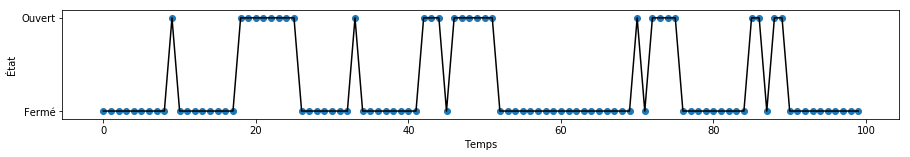

In [12]:
P = np.array([[0.9,.1],
              [0.4,0.6]])
mu = np.array([.3,.7])

traj = mc_trajectoire(mu, P, 100)
trace_mc_trajectoire(traj, ['Fermé','Ouvert'])

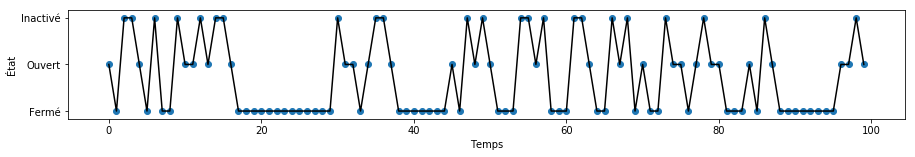

In [13]:
P2 = np.array([[0.8,.1,.1],
              [0.4,0.3,0.3],
              [0.2,0.6,0.2]])
mu2 = np.array([.3,.7,0])

traj = mc_trajectoire(mu2, P2, 100)
trace_mc_trajectoire(traj, ['Fermé','Ouvert','Inactivé'])

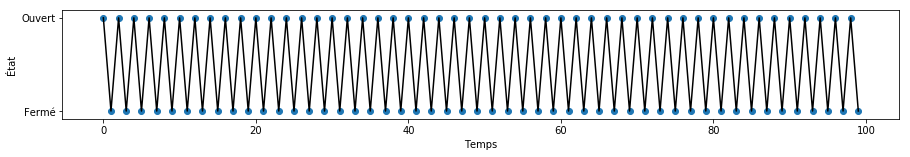

In [14]:
P3 = np.array([[0,1],
               [1,0]])
mu3 = np.array([.1,.9])

traj = mc_trajectoire(mu3, P3, 100)
trace_mc_trajectoire(traj, ['Fermé','Ouvert','Inactivé'])

# Mesure invariante et théorème ergodique

La mesure invariante d'une chaine de Markov recurrente positive est donnée par le vecteur propre dominant de sa matrice de transition.

Si on a une trajectoire, la proportion du temps passé en $i$ est:


$$\tau_i = \frac{1}{T}\sum^T_{k=0} 1_{(X_k = i)}$$


Si on a N trajectoires notées $X^{(1)},X^{(2)},...X^{(N)}$, l'estimateur de la probabilité d'un evenement: 

$$ \mathbb P (X_t = i) \approx  \rho_{t,i} = \frac{1}{N} \sum_{j=0}^N 1_{(X^{(j)}_t = i)} $$

In [15]:
# Écrire une fonction trouver_mesure_invariante(P)
# Qui renvoie la mesure invariante d'une matrice stochastique P
# Utilisez: np.linalg.eig np.argmax

In [16]:
def trouver_mesure_invariante(P):
    """Retourne la mesure invariante d'une matrice stochastique P"""
       
    # Tester si la matrice est stochastique. 
    assert_transition_matrix(P) 
    
    # Trouver le vecteur propre à gauche 
    # /!\ linalg.eig renvoie la valeur propre à droite,
    # il faut transposer la matrice de départ pour avoir
    # celle à gauche. Exercice: le prouver. 
    valp, vecp = np.linalg.eig(P.transpose())
    
    # Trouver la valeur propre dominante
    # On sait qu'elle existe grâce au thèorème de Perron-Frobenius. 
    pos_valp_dom = np.argmax(valp)
    vecp_dom = vecp[:, pos_valp_dom]
        
    # Vérifier que la valeur propre dominante est 1. 
    assert abs(np.max(valp) - 1) < 1e-10
    
    # Trouver le vecteur propre dominant 
    # et le remettre à l'échelle pour que la somme 
    # de ses éléments soit 1. 
    vecp_dom = vecp[:,pos_valp_dom]/np.sum(vecp_dom)
    
    return vecp_dom

In [17]:
mesure_inv = trouver_mesure_invariante(P2)
np.testing.assert_allclose(mesure_inv, mesure_inv @ P2)

In [18]:
# Faire de nombreuses réalisations,
R = 10000 #Nombre de trajectoires
T = 500 #Longueur d'une trajectoire

state_space = np.arange(P2.shape[0])
names = ('Fermé', 'Ouvert', 'Inactivé')

mu = np.random.random(P2.shape[0])
mu /= mu.sum()

trajs =  np.array([mc_trajectoire(mu,P2,T) for _ in range(R)])
print(trajs.shape)

mesure_inv = trouver_mesure_invariante(P2)
mesure_inv

(10000, 500)


array([0.61290323, 0.22580645, 0.16129032])

# Proportion du temps passé en un état donné

On cherche à mesurer la proportion du temps passé dans un état donné et à l'afficher sous forme graphique

In [19]:
# Écrire une fonction proportion_temps_passe qui affiche la proportion 
# du temps passé dans chaque état pour une trajectoire.
# Vérifier la convergence vers la mesure invariante. 
# Utilisez plt.hist, plt.hlines  

In [20]:
def trace_proportion_temps_passe(espace_detat, trajs, mesure_inv=None, noms_etats=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(7,5))
    ticks = espace_detat
    if noms_etats is None:
        noms_etats = espace_detat
    plt.hist(trajs.flat, density=True, bins=[0,1,2,3],          label = r'$\frac{1}{T}\sum^T 1_{(X_k = i)}$')

    if mesure_inv is not None:
        ax.hlines(mesure_inv,
                  0,len(state_space),
                  label='Mesure invariante')
    ax.set(xlabel='État',
           ylabel='Proportion du temps passé',
           title=r'$\frac{1}{T}\sum^T 1_{(X_k = i)}$',
           xticks=state_space,
           xticklabels=noms_etats)
    plt.legend()

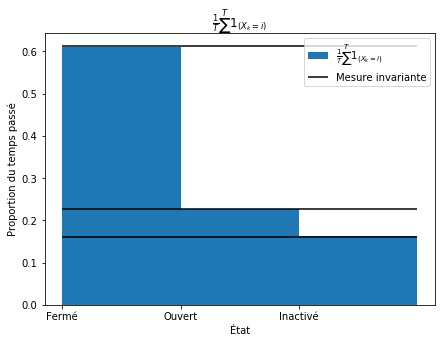

In [21]:
proportions = np.array([  np.sum(trajs==i) for i in state_space])  /trajs.size 
trace_proportion_temps_passe(state_space,
                             trajs,
                             mesure_inv=mesure_inv, 
                             noms_etats=names)

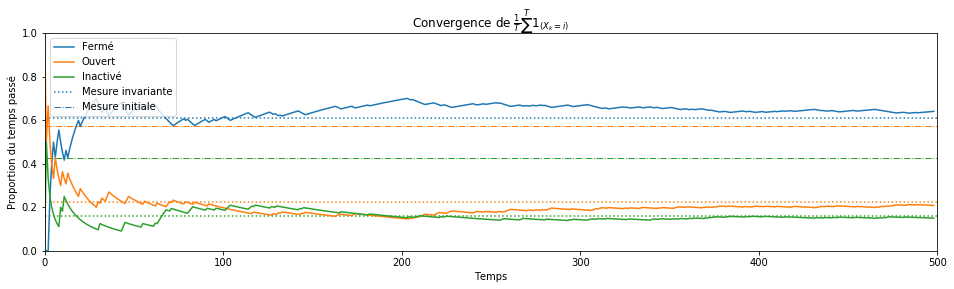

In [22]:
def trace_convergence_temps_passe(trajs, noms,  mesure_inv, mu,ax=None):
    proportions = np.array([np.array([(trajs[0,:t]==i).sum()/(trajs[0,:t]).size for i in state_space])
                            for t in range(1,trajs.shape[1])])
    if ax is None:
        fig, ax = plt.subplots(figsize=(16,4))
    for i,name in enumerate(names):
        plt.plot(proportions[:,i],label=name)
    ax.hlines(mesure_inv,
              0,trajs.shape[1],
              linestyle=':',
              color=('C0','C1','C2'),
              label='Mesure invariante')
    ax.hlines(mu,
              0,trajs.shape[1],
              linestyle='-.',
              linewidth=1,
              color=('C0','C1','C2'),
              label='Mesure initiale')
    ax.set(xlabel='Temps',
           ylabel='Proportion du temps passé',
           ylim=(0,1),
           xlim=(0,trajs.shape[1]),
           title=r'Convergence de $\frac{1}{T}\sum^T 1_{(X_k = i)}$')
    ax.legend()
    
trace_convergence_temps_passe(trajs,names, mesure_inv, mu)

# Probabilité d'être dans un état donné à un temps donné

In [23]:
# (*) Écrire une fonction qui estime numériquement P(X_t) à partir de plusieurs trajectoires.
# (**) Écrire une fonction qui calcule P(X_t) par récurrence. 
# Vérifier la convergence en loi

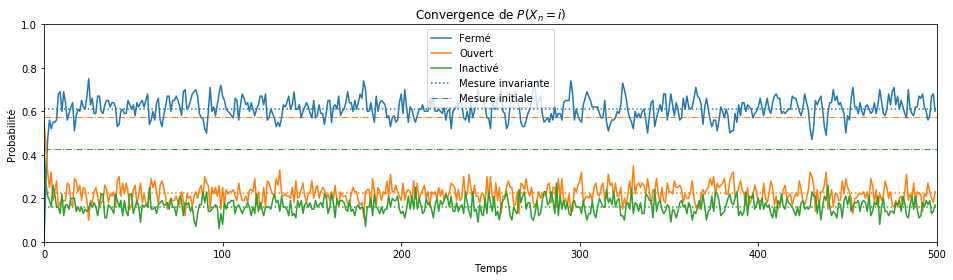

In [24]:
def trace_convergence_loi(trajs, noms, mesure_inv, mu, ax=None):
    proportions = np.array([(trajs==n).sum(0)/trajs.shape[0] for n,name in enumerate(noms)])
    if ax is None:
            fig, ax = plt.subplots(figsize=(16,4))
    for i,name in enumerate(names):
        plt.plot(proportions[i,:],label=name)
    ax.hlines(mesure_inv,
              0,trajs.shape[1],
              linestyle=':',
              color=('C0','C1','C2'),
              label='Mesure invariante')
    ax.hlines(mu,
              0,trajs.shape[1],
              linestyle='-.',
              linewidth=1,
              color=('C0','C1','C2'),
              label='Mesure initiale')
    ax.set(xlabel='Temps',
           ylabel='Probabilité',
           ylim=(0,1),
           xlim=(0,trajs.shape[1]),
           title=r'Convergence de $P(X_n = i)$')
    ax.legend()
trace_convergence_loi(trajs[:100,:],names, mesure_inv, mu)

In [25]:
# Que se passe-t-il pour P3 ? Comment l'expliquer ? 

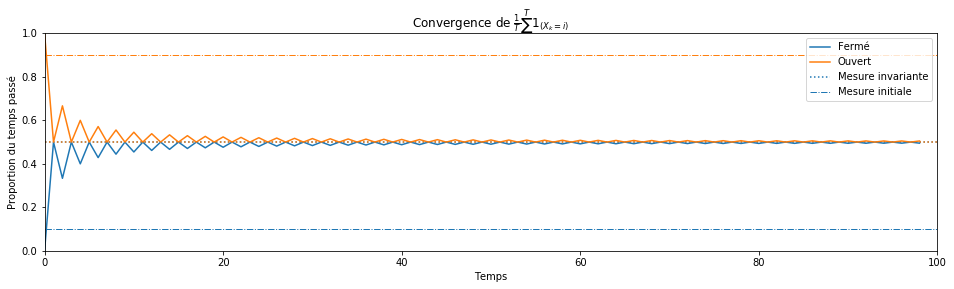

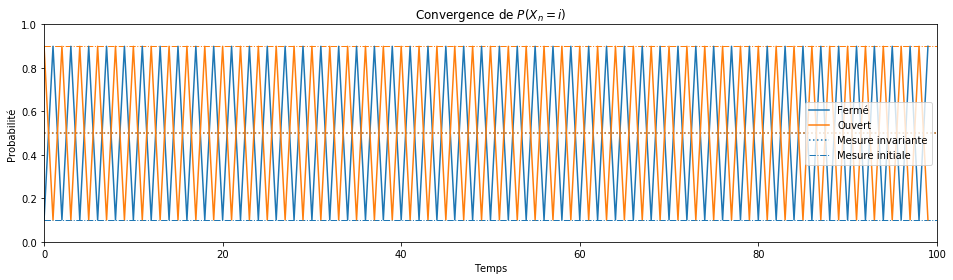

In [26]:
# Faire de nombreuses réalisations,
R = 1000 # Nombre de trajectoires
T = 100 #Longueur d'une trajectoire

state_space = np.arange(P3.shape[0])
names = ('Fermé', 'Ouvert')

trajs =  np.array([mc_trajectoire(mu3,P3,T) for _ in range(R)])

mesure_inv3 = trouver_mesure_invariante(P3)

trace_convergence_temps_passe(trajs,names,mesure_inv3,mu3)
plt.show()
trace_convergence_loi(trajs,names,mesure_inv3,mu3)
plt.show()

# Retour à nos canaux

Les fichiers `ion_channel_1` et `ion_channel_2` contiennent des séries temporelles de mesure de patch clamp qui donnent l'état ouvert ou fermé d'un canal au cours du temps.

In [27]:
# Écrire une fonction estimate_P(trajectoire)
# qui estime une matrice de transition de taille 2x2 à partir de la trajectoire
# Que constatez vous ? 

In [28]:
def estimate_P(traj):
    """Estime la matrice de transition de la chaine 2x2 à partir d'une réalisation de la trajectoire.
    Args:
        traj (np.array): réalisation de la trajectoire.  
    Returns:
        (np.array) Une matrice stochastique 2x2 .
    """

In [29]:
def estimate_P(traj):
    """Estime la matrice de transition de la chaine 2x2 à partir d'une réalisation de la trajectoire.
    Args:
        traj (np.array): réalisation de la trajectoire.  
    Returns:
        (np.array) Une matrice stochastique 2x2 .
    """
    
    # On vérifie que les données sont conformes. 
    assert all(np.logical_or(traj==0, traj==1))
    
    # Créer une matrice vide. 
    P = np.zeros((2,2))
    
    # Compter le nombre de transition entre chaque 
    # paire d'état
    for pn,pnm1 in zip(traj[1:], traj[:-1]):
        P[pnm1,pn] += 1
    
    # Normaliser pour que la matrice soit stochastique. 
    P /= np.hstack([P.sum(1)[:,np.newaxis]]*2)
    
    return P

In [40]:
ion_channel_1 = np.fromfile('ion_channel_1', sep=',', dtype=int)
ion_channel_2 = np.fromfile('ion_channel_2', sep=',', dtype=int)

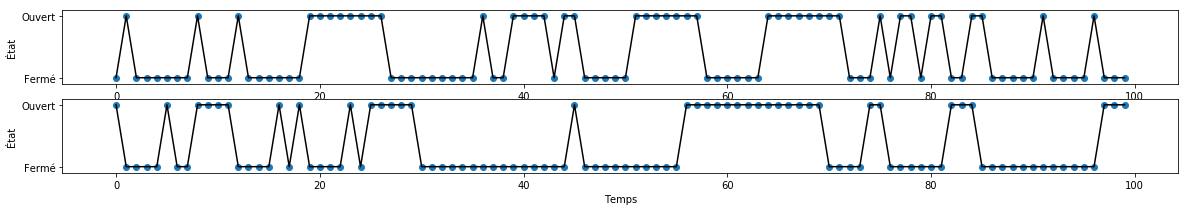

In [41]:
fig, ax = plt.subplots(2,1,figsize=(20,3))
trace_mc_trajectoire(ion_channel_1[:100], ['Fermé','Ouvert'], ax[0])
trace_mc_trajectoire(ion_channel_2[:100], ['Fermé','Ouvert'], ax[1])

In [42]:
estimate_P(ion_channel_1)

array([[0.79965139, 0.20034861],
       [0.30352876, 0.69647124]])

In [43]:
estimate_P(ion_channel_2)

array([[0.80099494, 0.19900506],
       [0.30236308, 0.69763692]])

Comment savoir si notre modèle est juste ? 

Dans un modèle à deux états, les temps de séjour dans l'état ouvert ouf fermé suivent lois géométriques. Regardons si c'est le cas.

In [44]:
# Écrire une fonction temps_changement(trajectoire) qui renvoie les liste des durées pendant 
# lequel le canal reste ouvert (resp fermé).
# Tracer les deux histogrames pour ion_channel_1 (ouvert/fermé) et ion_channel_2 (ouvert/fermé).
# Utilisez: plt.hist,

# Quelle est la distribution théorique de ces temps d'ouverture/fermeture
# si le phénomène suit la distribution d'une chaine de markov de taille 2x2 ?
# Tracez-là par dessus les histogrammes. 
# Utilisez: scipy.stats.xxx.pmf où xxx est le nom de la loi discrète parmi:
# https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions

In [45]:
def measure_residence_times(traj):
    """Estime les temps de séjour de la chaine 2x2 à partir d'une réalisation de la trajectoire.
    Args:
        traj (np.array): réalisation de la trajectoire.  
    Returns:
        (tuple of list): liste des temps de séjour dans l'état 0, liste des temps de séjour dans l'état 1. 
    """
    
    # Vérifie qu'il s'agit bien d'une trajectoire de chaine à deux état. 
    assert all(np.logical_or(traj==0, traj==1)), 'Invalid trajectory'

    # Initialisation
    stretch = ([], [])
    current = 1

    # Pour chaque transition: 
    # si l'état a changé on enregistre la durée du séjour dans l'état précédent,
    # si non on ajoute 1 à la durée du séjour. 
    for pn,pnm1 in zip(traj[1:], traj[:-1]):
        if pn != pnm1:
            stretch[pnm1].append(current)
            current = 1
        else:
            current += 1
            
    stretch[traj[-1]].append(current)
    
    return stretch

assert measure_residence_times(np.array([0,0,0,1,1,1,0,0,1,0,0])) == ([3,2,2],[3,1])

def display_residence_times(rtimes):
    """Affiche le résultat de measure_residence_time"""
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    for i,(val,ax) in enumerate(zip(rtimes,axes)):
        x = np.arange(np.max(val))
        ax.step(x+1, scipy.stats.geom.pmf(x, 1/np.mean(val)),label='Loi géométrique')
        h,b,_ = ax.hist(val, density=True, bins=x, label='Empirique')
        ax.set(xlabel='durée', ylabel='densité', title="Temps de séjour dans l'état {}".format(i))
        ax.legend()

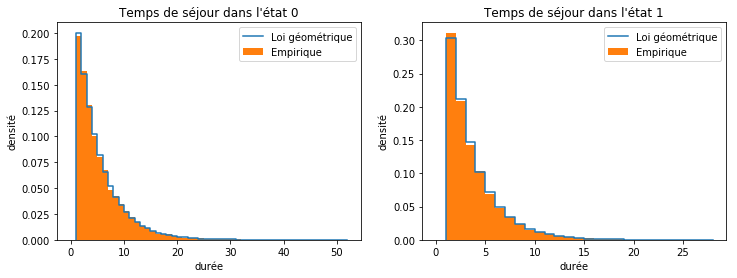

In [46]:
display_residence_times(measure_residence_times(ion_channel_1))

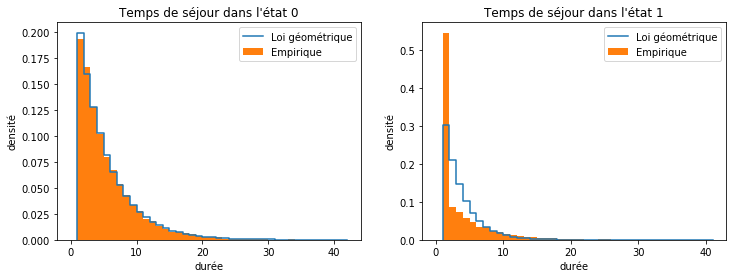

In [47]:
display_residence_times(measure_residence_times(ion_channel_2))

Les deux jeux de données donnent la même matrice de transition mais le second n'est pas issu d'une chaîne de Markov à deux état ! Dans la littérature, la méthode pour étudier ce genre de sytème et de faire un modèle de mélange (statistique) pour voir si le temps de séjour n'est pas la composition de plusieurs loi géométriques, ce qui donne un indice sur le nombre d'états cachés qui existent. On peut ensuite paramétriser un [modèle de Markov Caché](https://fr.wikipedia.org/wiki/Mod%C3%A8le_de_Markov_cach%C3%A9).

In [39]:
# Code pour générer le jeu de donnée... 
P2 = np.array([[0.8,.1,.1],
              [0.9,0,0.1],
              [0.2,0,.8]])
def collapse(P):
    o_to_c = P[0,1] + P[0,2]
    pi = trouver_mesure_invariante(P)
    c_to_o = (pi[1] * P[1,0] + pi[2] * P[2,0]) / (pi[1]+pi[2])
    return np.array([[1-o_to_c, o_to_c],
                     [c_to_o, 1-c_to_o]])
P1 = collapse(P2)
ion_channel_2 = mc_trajectoire(mu2, P2, 100000)
ion_channel_1 = mc_trajectoire(trouver_mesure_invariante(P1), P1, 100000)
ion_channel_2 = np.int_(np.bool_(ion_channel_2))
ion_channel_1.tofile('ion_channel_1', sep=',')
ion_channel_2.tofile('ion_channel_2', sep=',')